# Crime in Washington DC

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

dc_crime_data = pd.read_csv('dc_crime_add_vars.csv')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## About Washington DC Crime Data

This data comes from the from the metropolitan police department website obtained via kaggle.
https://www.kaggle.com/vinchinzu/dc-metro-crime-data.

Looking at this data we can see when, how, and where crime was committed in Washington DC.

* The data contains 342,867 reports of crime spanning from 2007-2017.

* The crimes range from Theft, Arson, Assault, Homicide, Sex Abuse, Robbery, and Burglary.  

* The crime location is identification by quadrants (Northeast, Southeast, Northwest,Southwest)


What this data does not include is population data.  This means we can predict the likelihood of a crime being committed in a specific area but we cannot predict the likelihood that a person will experience a crime in a specific area. 

### Why is Washington DC Crime Interesting to me?

This dataset is of personal interest to me because of a friend who has decided to move to Washington DC.  I would like to know if DC has become safer or more dangerous over the years.  If so, what kind of crimes are being committed and in which locations.

## Overview of Data

In [2]:
dc_crime_data.head()

,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,4,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


In [3]:
dc_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 32 columns):
Unnamed: 0              342867 non-null int64
X                       342867 non-null int64
REPORT_DAT              342867 non-null object
SHIFT                   342867 non-null object
OFFENSE                 342867 non-null object
METHOD                  342867 non-null object
BLOCK                   342867 non-null object
DISTRICT                342667 non-null float64
PSA                     342616 non-null float64
WARD                    342867 non-null int64
ANC                     342867 non-null object
NEIGHBORHOOD_CLUSTER    338162 non-null object
BLOCK_GROUP             341776 non-null object
CENSUS_TRACT            341776 non-null float64
VOTING_PRECINCT         342783 non-null object
CCN                     342867 non-null int64
START_DATE              342854 non-null object
END_DATE                331216 non-null object
XBLOCK                  342867 non-null floa

## When was Crime in Washington DC at its Worst?

I want to know if crime in Washington DC has gotten better or worse over the years.  

Violent crime is of particular interest.  *Crimetype* identifies a crime as either violent or non-violent. Converting this field into separate boolean fields will make it easier to count and compare violent vs. non-violent crimes.  

In [4]:
dc_crime_data['count'] = 1
dc_crime_data['violent'] = 0
dc_crime_data['non_violent'] = 0

dc_crime_data.loc[dc_crime_data.crimetype == "Non-Violent", "non_violent"] = 1
dc_crime_data.loc[dc_crime_data.crimetype == "Violent", "violent"] = 1

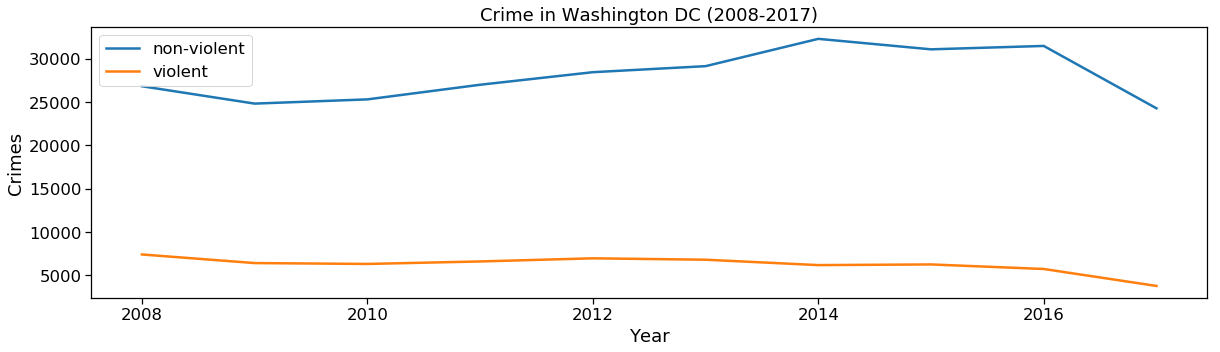

,year,violent,non_violent,count
0,2008,7397,26811,34208
1,2009,6404,24806,31210
2,2010,6303,25294,31597
3,2011,6591,26983,33574
4,2012,6953,28432,35385
5,2013,6791,29128,35919
6,2014,6169,32279,38448
7,2015,6246,31070,37316
8,2016,5721,31462,37183
9,2017,3764,24263,28027


In [5]:
years = dc_crime_data.groupby(['year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
years.reset_index(inplace=True)

plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.title("Crime in Washington DC (2008-2017)")
plt.legend()
plt.show()
years

**The data suggest a dramatic decrease in crime from 2016 to 2017.  Because the data ends in 2017, it seems possible the data only includes 2017 up until the time the data was collected. If data has not been collected for the entire year of 2017 this would explain the dramatic dropoff in number of crimes.**

In [6]:
pd.to_datetime(dc_crime_data[dc_crime_data['year'] == 2017]['date']).sort_values(ascending=False).head(5)

189912   2017-11-03 00:26:42
139931   2017-11-02 23:43:34
341995   2017-11-02 23:28:47
38286    2017-11-02 23:09:39
251999   2017-11-02 23:03:53
Name: date, dtype: datetime64[ns]

After filtering the data for 2017 and sorting by the date, the last 5 records show there are no records after November 3, 2017.  It would be reasonable to assume the 2017 data is missing after this date.

With two months missing from the 2017 data, 2017 cannot be compared to the other years, and will be removed for the remainder of this analysis when comparing data from year to year.  

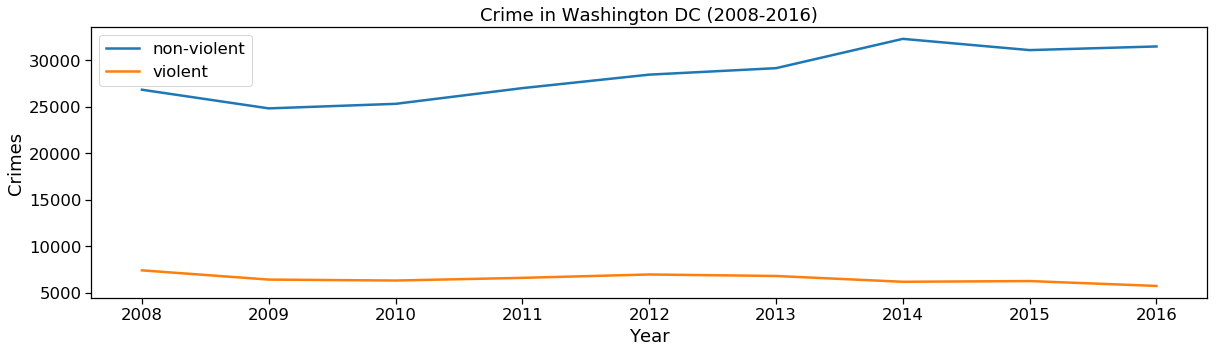

,year,violent,non_violent,count
0,2008,7397,26811,34208
1,2009,6404,24806,31210
2,2010,6303,25294,31597
3,2011,6591,26983,33574
4,2012,6953,28432,35385
5,2013,6791,29128,35919
6,2014,6169,32279,38448
7,2015,6246,31070,37316
8,2016,5721,31462,37183


In [7]:
dc_crime_data.drop(dc_crime_data[dc_crime_data.year == 2017].index, inplace=True)
years.drop(years[years.year == 2017].index, inplace=True)

plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.title("Crime in Washington DC (2008-2016)")
plt.legend()
plt.show()
years

Removing 2017 from the data results in the above graph which now accurately describes the changes in crime from year to year

##### * We see violent crime has remained mostly constant.  

##### * Non-violent crime has been on the rise.

##### * There is a particularly dramatic increase from 2013 to 2014 without dropping back down.

## What Kind of Crime Increased?

We saw that crime increased rather quickly starting in 2013.  We also saw that it was non-violent crime that increased.  

If we look at the *offense* type, we can determine exactly which offenses were being committed to cause the increase of crime.

In [8]:
offense_years = dc_crime_data.groupby(['OFFENSE', 'year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
offense_years.reset_index(inplace=True)

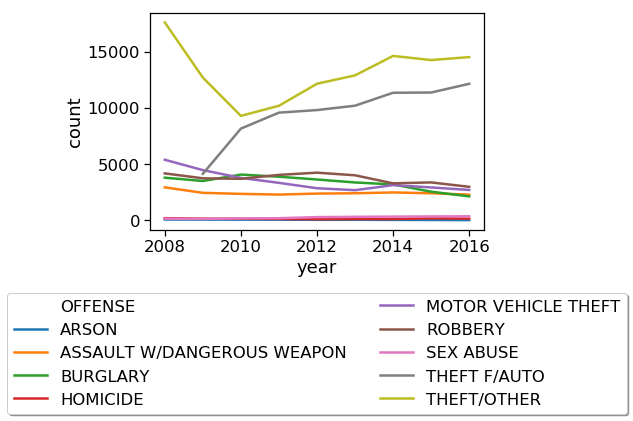

In [9]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x="year", y="count", hue="OFFENSE",data=offense_years)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=2)
plt.show()

##### * From this we can see the particular crimes that increased where theft.

This makes sense because we know it was non-violent crimes that increased.  

## Where did the Crime Increase?

Now we know that crime has increased a lot from 2013 to 2014 without declining again.

We know the increase of crimes were theft related. 

Next we can determine where the crimes were being committed if we look at the *quad* data.

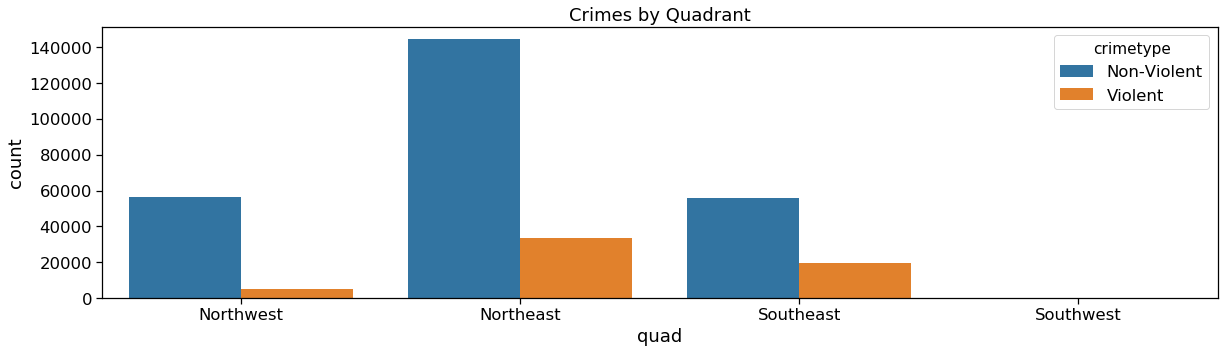

Northeast    177674
Southeast     75438
Northwest     61715
Southwest        13
Name: quad, dtype: int64

In [10]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Quadrant")
sns.countplot(x='quad',data=dc_crime_data, hue='crimetype')
plt.show()
dc_crime_data['quad'].value_counts()

The distribution of crimes by quadrant shows a majority of crimes occurred in the Northeast while practically zero crimes occured in the Southwest. While population is not represented in the data, it seems likely there is no population in the Southwest. Looking at a map confirms this suspicion showing very little land in the Southwest quadrant of Washington DC.

In [11]:
quad_years = dc_crime_data.groupby(['quad', 'year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
quad_years.reset_index(inplace=True)

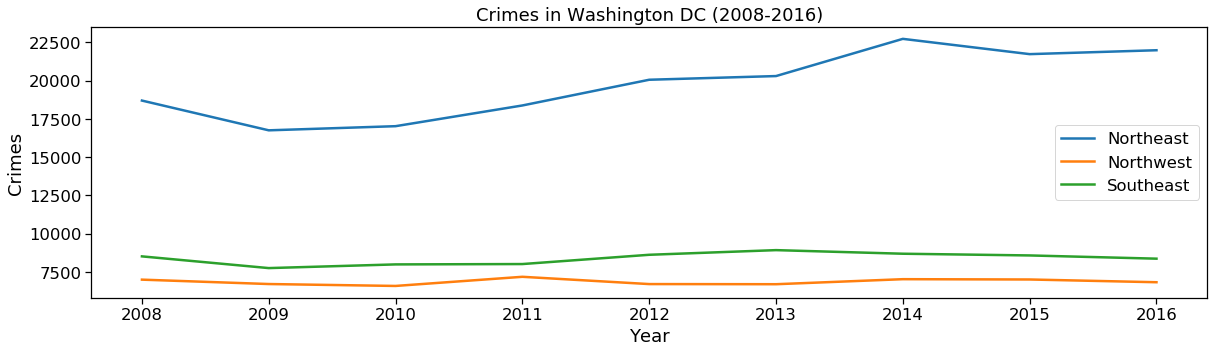

In [12]:
plt.figure(figsize=(20,5))
plt.plot(quad_years.loc[quad_years.quad == 'Northeast','year'], quad_years.loc[quad_years.quad == 'Northeast','count'], label='Northeast')
plt.plot(quad_years.loc[quad_years.quad == 'Northwest','year'], quad_years.loc[quad_years.quad == 'Northwest','count'], label='Northwest')
plt.plot(quad_years.loc[quad_years.quad == 'Southeast','year'], quad_years.loc[quad_years.quad == 'Southeast','count'], label='Southeast')

plt.xlabel('Year')
plt.ylabel('Crimes')
plt.title("Crimes in Washington DC (2008-2016)")
plt.legend()
plt.show()


##### * Here we can see the increase of crime is all occurring in the same quadrant, Northeast 

## Conclusion

If we just look at the number of crimes being committed over the years we can tell crime has been increasing in Washington DC.  

By delving deeper into the data and breaking it down, we can determine it is actually just non-violent theft which started to increase in the Northeast quadrant starting in 2013.

It's difficult to make a profound conclusion without population data.  It's likely the majority of the population is in the Northeast quadrant.  It's not clear what happened between 2013 and 2014 to cause the increase of theft. It could be due to population growth, economical situations, or a number of other factors.  However, we do know that Washington DC has not seen an increase in the amount of violent crimes.

## Further Reasearch

Further data should be collected to merge neighbourhood population data with this crime data.  Right now we can only compare the number of crimes occurring, but not the likelihood that one will experience a crime.  

Ideally, we count the number of crimes in each neighborhood.  Then we use the violent/non-violent crime data to assign weights to those neighbourhood crime numbers.  For instance, the total crimes for a neighborhood might be the number of non-violent crimes plus 1.25 times the number of violent crimes.  Then we divide that number by the total number of people in that area.  This way we can see how dangerous an area is, not just by looking at the likelihood a person will experience a crime but also considering that a violent crime is more dangerous than a non-violent crime.  

Additionally, the data includes latitude and longitude coordinates of the crimes.  It would be nice to group these coordinates into areas about the size of a city block.  Then we can create a heatmap to overlay on top of a map of Washington DC.  This would make it the most easy to visualize where most of the crime was being committed.  